In [1]:
%%capture --no-display
import os
from custom_simulation import CustomSimulation
from surface_preparer import SurfacePreparer
from connectome_editor import ConnectomeEditor
from utility import classify_signal

# Init data saving folder:
SAVE_FOLDER = './result/v2'
ROOT_FOLDER = os.getcwd()
try:
    os.listdir(SAVE_FOLDER)
except:
    os.mkdir(SAVE_FOLDER)

# Create 2 cortical columns in PFCdl_R and init the simulator

In [2]:
# Define variables of interests
stimvals = [1e-3, 2] # Stimulus strengths

# Define stimulus region
stim_region = {'A1_R': 'Primary auditory cortex'} 
# Load the surface/connectome to change
surface = SurfacePreparer(SAVE_FOLDER)
# Find target region
target_region_id = surface.id_finder('PFCdl_R')  

# Change the surface/connectome to create 2 cortical columns called a and b in the target region
# Associated weights are divided by 2
connectivity_to_edit = ROOT_FOLDER + '/tvb_model_reference/data/macaque/Connectivity2/'
new_connectivity_file_name = "Connectivity_mod3"
new_connectivity_path = ROOT_FOLDER + f'/tvb_model_reference/data/macaque/{new_connectivity_file_name}/'
connectome_editor = ConnectomeEditor(surface, connectivity_to_edit, new_connectivity_path)
connectome_editor.duplicate_region(target_region_id)
connectome_editor.save_changes()

# Load new modified surface/connectome
surface_new = SurfacePreparer(SAVE_FOLDER, con_name = f'{new_connectivity_file_name}.zip')

# Define the new target regions
target_region_a = 'PFCdl_Ra'
target_region_b = 'PFCdl_Rb'

# Find id of these regionis
target_region_a_id = surface_new.id_finder(target_region_a)
target_region_b_id = surface_new.id_finder(target_region_b)

# Run the simulation and output 4 plots (2 stimvals in 2 corticals)

... loading file: b5_stim0.001_T1000000000.0_A1_R
... loading file: b5_stim2_T1000000000.0_A1_R


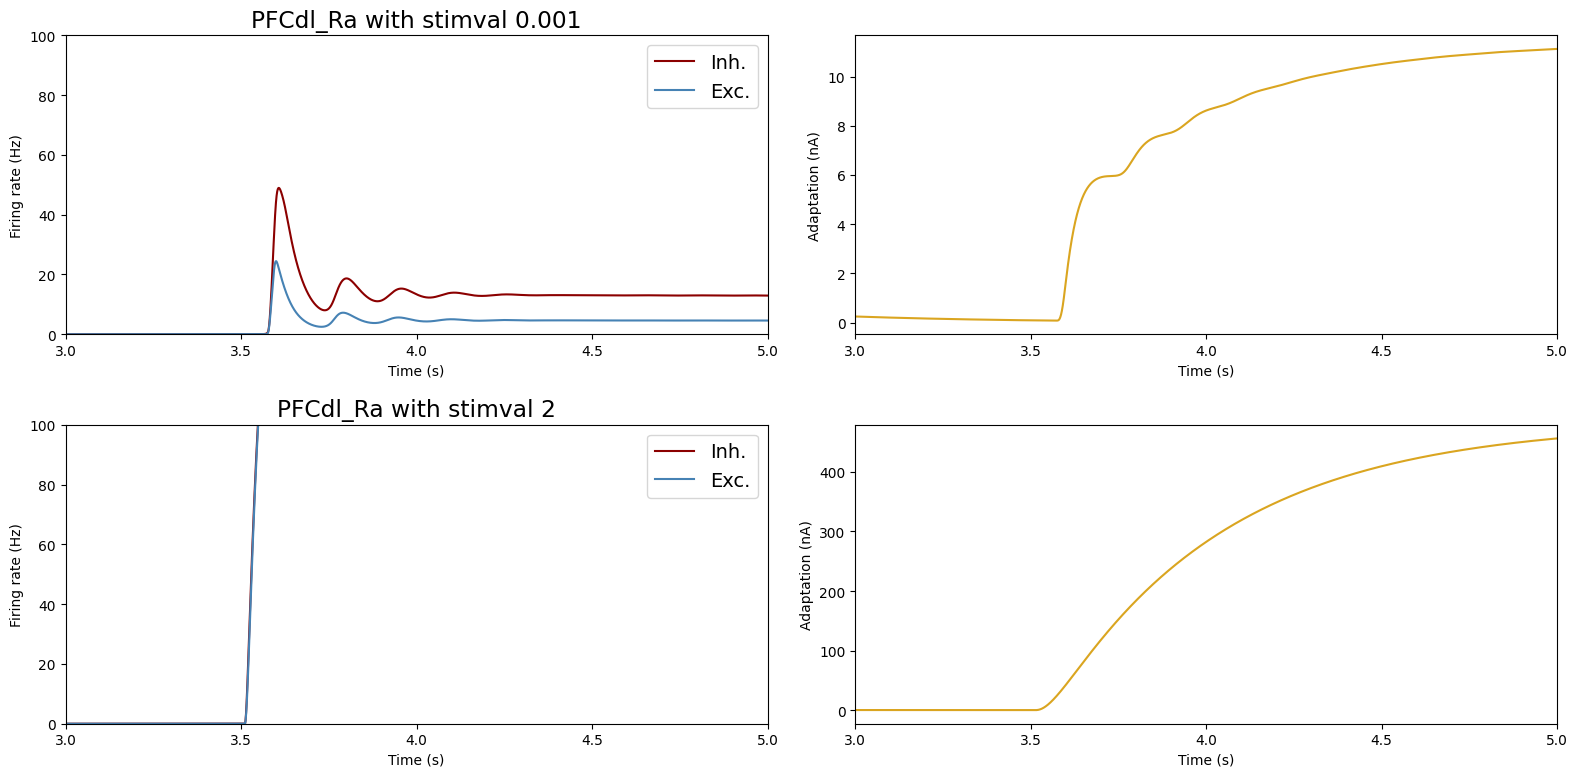

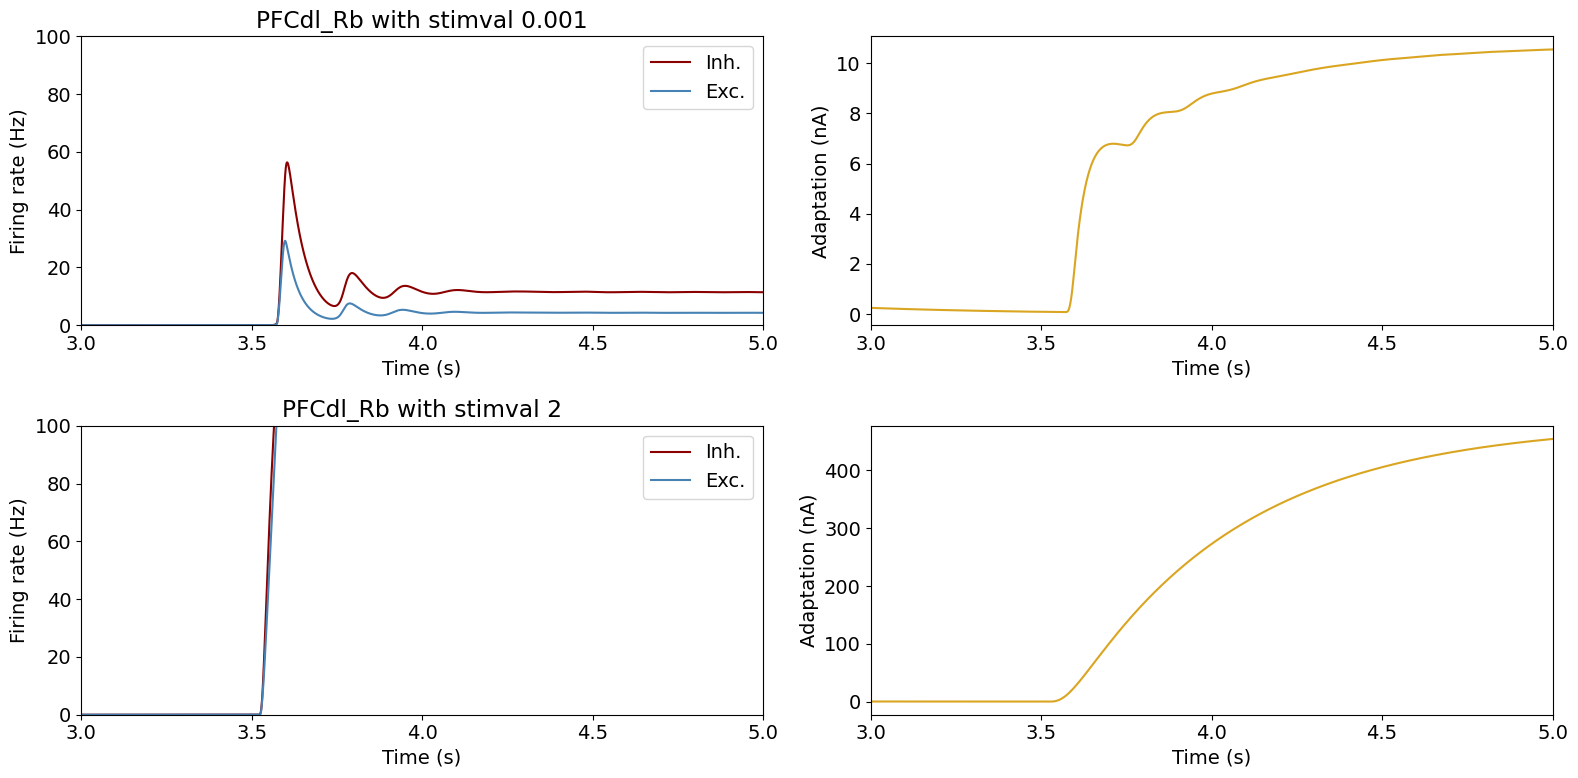

In [3]:
# Create and init a simulator
# Default b_value = 5 (asynchronous) and interstim_t = 1e9 (1 stimulus)
customSim = CustomSimulation(SAVE_FOLDER, surface_new, stim_region, stimvals, isIntNoise = False, isWeightNoise = True)

# Run the simulation
# customSim.main_simulation_loop() 

# Load simulation variables
customSim.load_simulation() 

# Plots from the Right Dorsolateral Prefrontal Cortex in PFCdl_Ra and PFCdl_Rb
customSim.plot_simulation(target_region_a) 
customSim.plot_simulation(target_region_b) 

Given the observed discrepancy in neuronal firing rates corresponding to different stimulus strength, it is suggested that a threshold-based method could be implemented to discern the stimulus used. Essentially, the distinct firing rates elicited by varying 'stimval' inputs could be categorized using a predefined threshold. Therefore, by analyzing the recorded neuronal firing rate, it may be possible to retroactively determine the initial stimulus value that was utilized. Considering the inhibitory firing rate exhibits a broad range of values, it is included in the analysis due to its potential to facilitate more effective thresholding

# Classify all four inhibitory firing rate outputs

In [5]:
#stimval=1e-3 in PFCdl_Ra
signal1 = customSim.FR_inh[0][:, target_region_a_id]
classify_signal(signal1)

#stimval=2 for in PFCdl_Ra
signal2 = customSim.FR_inh[1][:, target_region_a_id]
classify_signal(signal2)

#stimval=1e-3 in PFCdl_Rb
signal3 = customSim.FR_inh[0][:, target_region_b_id]
classify_signal(signal3)

#stimval=2 in PFCdl_Rb
signal4 = customSim.FR_inh[1][:, target_region_b_id]
classify_signal(signal4)

probably weak audio stimulus (stimval=1e-3)
probably strong audio stimulus (stimval=2)
probably weak audio stimulus (stimval=1e-3)
probably strong audio stimulus (stimval=2)


Two distinct audio stimuli were utilized, classified based on their frequency range: a low-frequency stimulus, designated as 'stimval=1e-3', and a high-frequency stimulus, termed as 'stimval=2'. Examination of the data suggests that it is theoretically feasible to identify the specific audio stimulus utilized at a given point in time, solely by observing the activity in the Prefrontal Cortex of a Macaque. This implies that the Prefrontal Cortex's response patterns could potentially serve as a reliable indicator of the nature of the auditory stimulus received, thereby enabling the decoding of the stimulus type from the neural activity.
